# Loading Libraries

Doing some experimentations I notice that there was a CUDA error coming with older version of PyTorch, so it's advisable to upgrade PyTorch version.

In [ ]:
!pip install --upgrade torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████████████████████████  | 834.1 MB 115.4 MB/s eta 0:00:01tcmalloc: large alloc 1147494400 bytes == 0x64f10000 @  0x7fc946cd5615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████████████████| 890.2 MB 6.6 kB/s 
     |████████████████████████████████| 557.1 MB 9.6 kB/s 
     |████████████████████████████████| 317.1 MB 36 kB/s 
     |████████████████████████████████| 21.0 MB 81.0 MB/s 
     |████████████████████████████████| 849 kB 83.6 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
ERROR: pip's dependency res

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.8 MB/s 
     |████████████████████████████████| 7.6 MB 65.2 MB/s 
     |████████████████████████████████| 182 kB 100.9 MB/s 


In [2]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 5.0 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=49f350a92b818d9476e6c60938c3c9ec75842dea2e6ba23e585998805fb68916
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [3]:
import time
import random
import datetime
import numpy as np
import pandas as pd
import json
import gzip

from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import re, string
import emoji
import nltk

import torch
import tensorflow as tf
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

from transformers import BertTokenizer
from transformers import get_linear_schedule_with_warmup
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification
from transformers import BertForSequenceClassification, AdamW, BertConfig

from tqdm import tqdm

In [4]:
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# If there's a GPU available...
if torch.cuda.is_available():    

    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")    

There are 1 GPU(s) available.
We will use the GPU: A100-SXM4-40GB


# Loading Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
inputData = pd.read_csv("/content/drive/MyDrive/CS-688_Project/Amazon/kindle_reviews.csv")

In [7]:
data = inputData[["overall","reviewText"]]
data = data.rename(columns={"overall": 0, "reviewText": 1})
data

,0,1
0,5,I enjoy vintage books and movies so I enjoyed ...
1,4,This book is a reissue of an old one; the auth...
2,4,This was a fairly interesting read. It had ol...
3,5,I'd never read any of the Amy Brewster mysteri...
4,4,"If you like period pieces - clothing, lingo, y..."
...,...,...
982614,5,Yasss hunny! This is a great read. That Dre is...
982615,5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...
982616,5,Great book! Cherika was a fool. She let that m...
982617,5,When I say this was an excellent book please b...


In [8]:
data.isna().sum()

0     0
1    22
dtype: int64

In [9]:
data.dropna(inplace=True)
data.shape

(982597, 2)

In [10]:
data.drop_duplicates(inplace=True)
data.shape

(982319, 2)

In [12]:
data[0] = data[0].apply(lambda x: 1 if x<=3 else 2)

In [13]:
data[0].value_counts()

2    828990
1    153329
Name: 0, dtype: int64

In [14]:
izuo1 = data.loc[data[0] == 1]
izuo2 = data.loc[data[0] == 2]

In [15]:
train1 = izuo1[:40000]
train2 = izuo2[:40000]

In [16]:
#concading tran1 and train2
frames = [train1,train2]
data = pd.concat(frames)

In [17]:
data = data.reset_index(drop=True)

In [18]:
data

,0,1
0,1,Well written. Interesting to see Sideous (thro...
1,1,Troy Denning's novella Recovery was originally...
2,1,"Another well written eBook by Troy Denning, bu..."
3,1,"With Ylesia, a novella originally published in..."
4,1,"The events of ""Ylesia"" take place during ""Dest..."
...,...,...
79995,2,"A great fun short story, very well written can..."
79996,2,This short story is a fun read. I hope Barbra ...
79997,2,I found this story laugh out loud funny. It i...
79998,2,"It's hard to rate a short story, go into to mu..."


In [19]:
data[1] = data[1].apply(lambda x: x.lower())
data

,0,1
0,1,well written. interesting to see sideous (thro...
1,1,troy denning's novella recovery was originally...
2,1,"another well written ebook by troy denning, bu..."
3,1,"with ylesia, a novella originally published in..."
4,1,"the events of ""ylesia"" take place during ""dest..."
...,...,...
79995,2,"a great fun short story, very well written can..."
79996,2,this short story is a fun read. i hope barbra ...
79997,2,i found this story laugh out loud funny. it i...
79998,2,"it's hard to rate a short story, go into to mu..."


# Processing Data

In [20]:
data.rename(columns = {0:'sentiment', 1:'reviewOld'}, inplace = True)
data

,sentiment,reviewOld
0,1,well written. interesting to see sideous (thro...
1,1,troy denning's novella recovery was originally...
2,1,"another well written ebook by troy denning, bu..."
3,1,"with ylesia, a novella originally published in..."
4,1,"the events of ""ylesia"" take place during ""dest..."
...,...,...
79995,2,"a great fun short story, very well written can..."
79996,2,this short story is a fun read. i hope barbra ...
79997,2,i found this story laugh out loud funny. it i...
79998,2,"it's hard to rate a short story, go into to mu..."


In [21]:
#Clean emojis from text
def strip_emoji(text):
  regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
  return regrex_pattern.sub(r'',text)

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#Remove special characters
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word) | ('#' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [22]:
#cleaning the tweets for training data.
reviewsNew = []
for t in data.reviewOld:
    reviewsNew.append(remove_mult_spaces(filter_chars(strip_all_entities(strip_emoji(t)))))

In [23]:
#updating the cleaned tweets in the dataframe as a new column
data['review'] = reviewsNew
data

,sentiment,reviewOld,review
0,1,well written. interesting to see sideous (thro...,well written interesting to see sideous throug...
1,1,troy denning's novella recovery was originally...,troy dennings novella recovery was originally ...
2,1,"another well written ebook by troy denning, bu...",another well written ebook by troy denning but...
3,1,"with ylesia, a novella originally published in...",with ylesia a novella originally published in ...
4,1,"the events of ""ylesia"" take place during ""dest...",the events of ylesia take place during destiny...
...,...,...,...
79995,2,"a great fun short story, very well written can...",a great fun short story very well written can ...
79996,2,this short story is a fun read. i hope barbra ...,this short story is a fun read i hope barbra a...
79997,2,i found this story laugh out loud funny. it i...,i found this story laugh out loud funny it is ...
79998,2,"it's hard to rate a short story, go into to mu...",its hard to rate a short story go into to much...


In [24]:
#data.sentimentOld.drop(inplace=True)
data = data[['sentiment','review']]
data

,sentiment,review
0,1,well written interesting to see sideous throug...
1,1,troy dennings novella recovery was originally ...
2,1,another well written ebook by troy denning but...
3,1,with ylesia a novella originally published in ...
4,1,the events of ylesia take place during destiny...
...,...,...
79995,2,a great fun short story very well written can ...
79996,2,this short story is a fun read i hope barbra a...
79997,2,i found this story laugh out loud funny it is ...
79998,2,its hard to rate a short story go into to much...


In [25]:
df=data

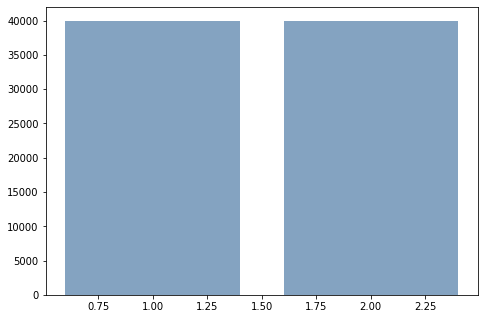

In [26]:
sentence = df['review'].tolist()
label1 = df['sentiment'].tolist()

c = Counter(label1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Intent = []
Occurance = []
for i in c.items():
  Intent.append(i[0])
  Occurance.append(i[1])
ax.bar(Intent,Occurance,color=(0.2, 0.4, 0.6, 0.6))  
plt.show()


# Data Preparation

In [27]:
dic={1:0,2:1}
ans={0:1,1:2}

In [28]:
labels=data['sentiment']
sentence=data['review']

for i in tqdm(range(len(labels))):
  labels[i]=dic[labels[i]]

  0%|          | 0/80000 [00:00<?, ?it/s]<ipython-input-28-785f4b4d167f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[i]=dic[labels[i]]
100%|██████████| 80000/80000 [00:18<00:00, 4329.53it/s]


In [29]:
for i in range(len(label1)):
 label1[i]=dic[label1[i]]

data={'sentence':sentence,'label1':labels}
df=pd.DataFrame(data)
print(len(df))
df=df.drop_duplicates()
print(len(df))

80000
79984


In [30]:
X_train, X_test, y_train, y_test = train_test_split(sentence, label1, test_size = 0.20, random_state = 0, stratify=label1)

In [31]:
pd.DataFrame(y_train).value_counts()

0    32000
1    32000
dtype: int64

In [32]:
sentences = X_train
labels = y_train

In [33]:
numClasses = 2
label_1_num_classes = numClasses
label1 = torch.LongTensor(labels)

# Loading RoBERTa Model and Creating Data Frame

In [34]:
print('Loading RoBERTa tokenizer...')
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base', do_lower_case=True)

# Print the original sentence.
print(' Original: ', sentences[0])
# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))
# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

Loading RoBERTa tokenizer...


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

 Original:  well written interesting to see sideous through maul maneuvering events to fit his plan we see human nature at work but no good guys to root for even rurit is a helpless pawn
Tokenized:  ['well', 'Ġwritten', 'Ġinteresting', 'Ġto', 'Ġsee', 'Ġside', 'ous', 'Ġthrough', 'Ġm', 'aul', 'Ġmaneuver', 'ing', 'Ġevents', 'Ġto', 'Ġfit', 'Ġhis', 'Ġplan', 'Ġwe', 'Ġsee', 'Ġhuman', 'Ġnature', 'Ġat', 'Ġwork', 'Ġbut', 'Ġno', 'Ġgood', 'Ġguys', 'Ġto', 'Ġroot', 'Ġfor', 'Ġeven', 'Ġr', 'ur', 'it', 'Ġis', 'Ġa', 'Ġhelpless', 'Ġpawn']
Token IDs:  [3056, 1982, 2679, 7, 192, 526, 1827, 149, 475, 6695, 21698, 154, 1061, 7, 2564, 39, 563, 52, 192, 1050, 2574, 23, 173, 53, 117, 205, 1669, 7, 9749, 13, 190, 910, 710, 405, 16, 10, 22445, 30386]


In [35]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

for sent in tqdm(sentences):
    encoded_dict = tokenizer.encode_plus(sent,add_special_tokens = True,max_length = 512,pad_to_max_length = True,
                        return_attention_mask = True, return_tensors = 'pt',)
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
all_labels = torch.stack([label1], dim=1)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

  0%|          | 0/64000 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 64000/64000 [00:29<00:00, 2143.85it/s]


Original:  well written interesting to see sideous through maul maneuvering events to fit his plan we see human nature at work but no good guys to root for even rurit is a helpless pawn
Token IDs: tensor([    0,  9226,    21,    10,  7297,   765,   527,    24,    16,  8444,
           53,   939, 46405,   465,    24,    14, 10222,   187,  4356,    10,
          410,  1236,  7560,    31,  2600,     8,  2494,   350,   203,  8444,
           63,    65,     9,   167,  1652,   147,    47,    32,    45,   686,
           99,    16,   164,    15,   454,     5,   253,   939,  6640,    24,
           53, 46405,   657,    24,    24,    16,  1982,   157,   959,   939,
        14594,    14,    89,    21,    55, 25730,    11,    24,    24,    21,
         2679,     7,  1166,   600,     2,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,  

In [36]:
dataset = TensorDataset(input_ids, attention_masks, all_labels)

# Create a 90-10 train-validation split.
train_size = int(0.7 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

44,800 training samples
19,200 validation samples


# Training on label 1

In [37]:
batch_size = 32
train_dataloader = DataLoader( train_dataset, shuffle=True, batch_size = batch_size)
validation_dataloader = DataLoader( val_dataset, shuffle=False, batch_size = batch_size )


model = RobertaForSequenceClassification.from_pretrained( 
    "roberta-base", num_labels = numClasses, output_attentions = False, output_hidden_states = False)

model.cuda()

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [38]:
optimizer = AdamW(model.parameters(), lr = 2e-5, eps = 1e-8, weight_decay=0.01)

epochs = 3
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 500, num_training_steps = total_steps)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [39]:
def flat_accuracy(preds1,labels):
    pred_flat1 = np.argmax(preds1, axis=1).flatten()
    labels = labels.flatten() 
    labels_flat1=np.asarray(labels)
    acc1= np.sum(pred_flat1 == labels_flat1) / len(labels_flat1)
    #return (acc1+acc2)/2
    return acc1

In [40]:
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [41]:
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # Perform one full pass over the training set.
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:

            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # print(b_labels.shape)

        model.zero_grad()        

        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       return_dict=True)
        label1_preds = result["logits"][:, :numClasses]
        label1_loss = torch.nn.functional.cross_entropy(label1_preds, b_labels[:, 0])


        loss = label1_loss

        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_accuracy1 = 0
    total_eval_accuracy2 = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():        

            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           return_dict=True)

        label1_preds = result["logits"][:, :label_1_num_classes]
        label1_loss = torch.nn.functional.cross_entropy(label1_preds, b_labels[:, 0])


        loss = label1_loss 
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        label1_preds = label1_preds.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        eval_1 = flat_accuracy(label1_preds,label_ids)
        total_eval_accuracy1+=eval_1

    # Report the final accuracy for this validation run.
    avg_val_accuracy1 = total_eval_accuracy1 / len(validation_dataloader)
    print("  Accuracy1: {0:.2f}".format(avg_val_accuracy1))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur. Label1.': avg_val_accuracy1,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )
    path = "epoch_"+str(epoch_i)+"_check.pth"
    torch.save(model.state_dict(), path)
 
print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))



======== Epoch 1 / 3 ========
Training...
  Batch    40  of  1,400.    Elapsed: 0:00:31.
  Batch    80  of  1,400.    Elapsed: 0:00:59.
  Batch   120  of  1,400.    Elapsed: 0:01:27.
  Batch   160  of  1,400.    Elapsed: 0:01:55.
  Batch   200  of  1,400.    Elapsed: 0:02:23.
  Batch   240  of  1,400.    Elapsed: 0:02:51.
  Batch   280  of  1,400.    Elapsed: 0:03:19.
  Batch   320  of  1,400.    Elapsed: 0:03:47.
  Batch   360  of  1,400.    Elapsed: 0:04:15.
  Batch   400  of  1,400.    Elapsed: 0:04:43.
  Batch   440  of  1,400.    Elapsed: 0:05:11.
  Batch   480  of  1,400.    Elapsed: 0:05:39.
  Batch   520  of  1,400.    Elapsed: 0:06:07.
  Batch   560  of  1,400.    Elapsed: 0:06:35.
  Batch   600  of  1,400.    Elapsed: 0:07:03.
  Batch   640  of  1,400.    Elapsed: 0:07:30.
  Batch   680  of  1,400.    Elapsed: 0:07:58.
  Batch   720  of  1,400.    Elapsed: 0:08:26.
  Batch   760  of  1,400.    Elapsed: 0:08:54.
  Batch   800  of  1,400.    Elapsed: 0:09:22.
  Batch   840  of

# Calculating testing accuracy.

In [42]:
data={'sentence':X_test,'label':y_test}
df=pd.DataFrame(data, columns =['label','sentence']) 

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.sentence.values
labels = df.label.values

label_1_num_classes = numClasses

# from sklearn.preprocessing import LabelEncoder

# label1_encoder = LabelEncoder()

# label1 = [item[0] for item in labels]
# label1 = label1_encoder.fit_transform(label1)

label1 = torch.LongTensor(labels)

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                sent,add_special_tokens = True,max_length = 512,pad_to_max_length = True, return_attention_mask = True,return_tensors = 'pt',)
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
all_labels = torch.stack([label1], dim=1)

# Set the batch size.  
batch_size = 32  


# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, all_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, shuffle=False, batch_size=batch_size)

Number of test sentences: 16,000



In [ ]:
sentences[0]

'i tried this book on a free basis it just did not suite my style of reading it is worth a quick read'

In [43]:
# Prediction on test set
print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))
prediction_list = []
real_list=[]
accuracy1 = 0
total_count = 0
misclassify1=0
misclassify_data=[]
misClassifiedLabel=[]
originalPredictions=[]

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  #logits = result.logits
  label1_preds = result["logits"][:, :label_1_num_classes]

  # Move logits and labels to CPU
  label1_preds = label1_preds.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  label1_preds=np.argmax(label1_preds,axis=1)
  label_ids = label_ids.flatten()

  for i in range(len(label_ids)):
    prediction_list.append(label1_preds[i])
    real_list.append(label_ids[i])
    if(label1_preds[i]==label_ids[i]):
      accuracy1+=1
    else:
      misclassify1+=1
      #for analyzing misclassified data
      misclassify_data.append(sentences[i])
      misClassifiedLabel.append(label1_preds[i])
      originalPredictions.append(label_ids[i])

print("")

print("Number of Label1 correctly predicted: "+str(accuracy1))
print("Number of Label1 misclassify: "+str(misclassify1))

print("Label1 Testing Accuracy: {:.2f}".format(accuracy1/(accuracy1+misclassify1) ) )
bert_singlelabel_accuracy1 = accuracy1/(accuracy1+misclassify1)

Predicting labels for 16,000 test sentences...

Number of Label1 correctly predicted: 14192
Number of Label1 misclassify: 1808
Label1 Testing Accuracy: 0.89


In [44]:
miclassifyDF = pd.DataFrame({'reviews':misclassify_data,'labelsPred':misClassifiedLabel,'labelsOriginal':originalPredictions})
miclassifyDF

,reviews,labelsPred,labelsOriginal
0,i enjoyed this selection of recipes and think ...,1,0
1,i loved the concept of this story and while it...,1,0
2,i didnt really like it it had potential but wh...,1,0
3,this book is not my cup of tea but if youre lo...,0,1
4,this is a really good book although a glossary...,1,0
...,...,...,...
1803,frozen delight is a short story about a woman ...,0,1
1804,atticus for the undead legal fiction seriestak...,0,1
1805,i enjoyed this selection of recipes and think ...,1,0
1806,the light is handy lightweight and wellbalance...,0,1


In [47]:
miclassifyDF.to_csv('misclassifiedRoBERTaKindle2Classes.csv')

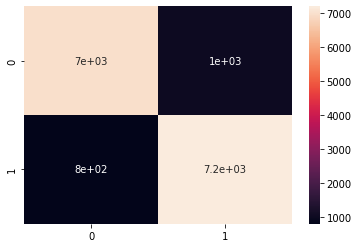

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(real_list,prediction_list), annot=True)